#Import Library yang Digunakan

In [34]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from itertools import product
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

#Load Data dari Google Drive

In [54]:
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/Skripsi_Data IHSG/Data Indeks Harga Saham Gabungan (IHSG).xlsx"
df = pd.read_excel(file_path)

print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      Tanggal    Close     Open     High      Low  Volume  Change %
0  04/01/2020  4466.04  4538.93  4627.42  4445.14    4.18     -1.61
1  04/02/2020  4531.69  4466.04  4531.69  4393.67    4.60      1.47
2  04/03/2020  4623.43  4531.69  4623.43  4531.81    5.87      2.02
3  04/06/2020  4811.83  4623.43  4811.83  4623.43    7.05      4.07
4  04/07/2020  4778.64  4811.83  4975.54  4721.72    8.62     -0.69
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      Tanggal    Close     Open     High      Low  Volume  Change %
0  04/01/2020  4466.04  4538.93  4627.42  4445.14    4.18     -1.61
1  04/02/2020  4531.69  4466.04  4531.69  4393.67    4.60      1.47
2  04/03/2020  4623.43  4531.69  4623.43  4531.81    5.87      2.02
3  04/06/2020  4811.83  4623.43  4811.83  4623.43    7.05     

#Cek Tipe Data

In [55]:
# Ubah tipe data kolom tanggal menjadi datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Tanggal   1208 non-null   datetime64[ns]
 1   Close     1208 non-null   float64       
 2   Open      1208 non-null   float64       
 3   High      1208 non-null   float64       
 4   Low       1208 non-null   float64       
 5   Volume    1208 non-null   float64       
 6   Change %  1208 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 66.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Tanggal   1208 non-null   datetime64[ns]
 1   Close     1208 non-null   float64       
 2   Open      1208 non-null   float64       
 3   High      1208 non-null   float64       
 4   Low       1208 non-null   float64

#Konversi Tipe Data pada Kolom Tanggal

In [37]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Tanggal   1208 non-null   datetime64[ns]
 1   Close     1208 non-null   float64       
 2   Open      1208 non-null   float64       
 3   High      1208 non-null   float64       
 4   Low       1208 non-null   float64       
 5   Volume    1208 non-null   float64       
 6   Change %  1208 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 66.2 KB


# Visualisasi Data

###Boxplot

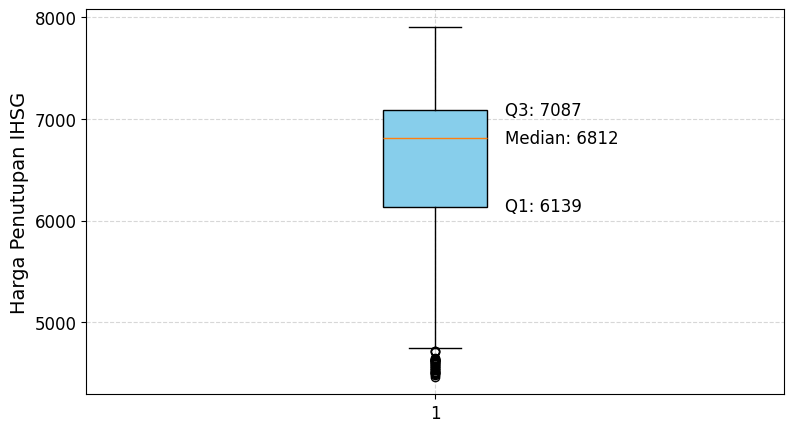

In [38]:
# Hitung statistik
q1 = df['Close'].quantile(0.25)
median = df['Close'].median()
q3 = df['Close'].quantile(0.75)

# Boxplot untuk mendeteksi outlier
plt.figure(figsize=(9, 5))
plt.boxplot(df['Close'], vert=True, patch_artist=True, boxprops=dict(facecolor="skyblue"))

plt.ylabel("Harga Penutupan IHSG", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(1000))

plt.text(1.1, median, f"Median: {median:.0f}", va='center', fontsize=12, color="black")
plt.text(1.1, q1, f"Q1: {q1:.0f}", va='center', fontsize=12, color="black")
plt.text(1.1, q3, f"Q3: {q3:.0f}", va='center', fontsize=12, color="black")

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

### Line Chart

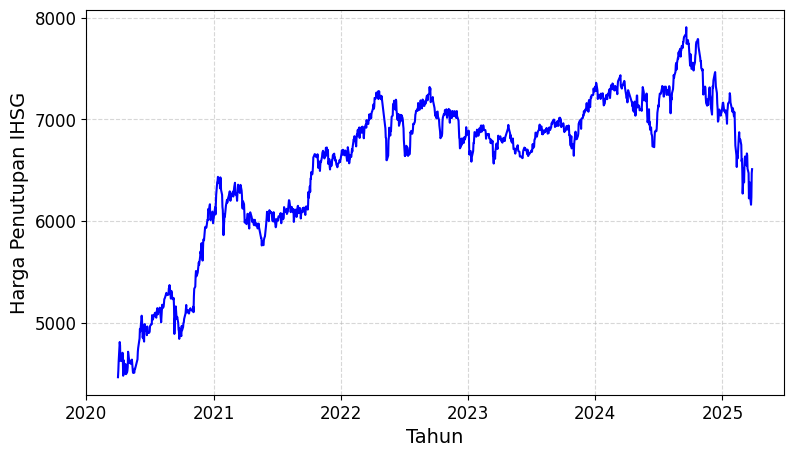

In [39]:
plt.figure(figsize=(9,5))
plt.plot(df['Tanggal'], df['Close'], color='blue')

plt.xlabel("Tahun", fontsize=14)
plt.ylabel("Harga Penutupan IHSG", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(1000))

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

#Histogram Distribusi

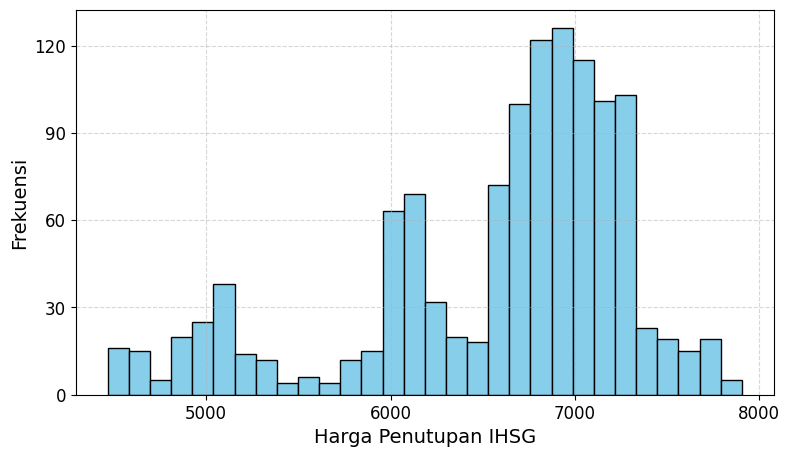

In [40]:
# Histogram distribusi harga (opsional, untuk memperkuat analisis distribusi)
plt.figure(figsize=(9,5))
plt.hist(df['Close'], bins=30, color="skyblue", edgecolor="black")

plt.xlabel("Harga Penutupan IHSG", fontsize=14)
plt.ylabel("Frekuensi", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.yaxis.set_major_locator(ticker.MultipleLocator(30))

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

#Pre-Processing Data
###Menentukan Kolom yang Digunakan

In [41]:
data = df[["Close"]].values

###Standarisasi Data

In [42]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
target_scaled = data_scaled[:, 0]

# Display hasil
print("\nStatistik setelah standarisasi (z-score):")
print("Mean:", np.mean(data_scaled, axis=0))
print("Std :", np.std(data_scaled, axis=0))

print("\nContoh 5 data hasil standarisasi:")
print(data_scaled[:5])


Statistik setelah standarisasi (z-score):
Mean: [-3.76446483e-16]
Std : [1.]

Contoh 5 data hasil standarisasi:
[[-2.82563479]
 [-2.73775139]
 [-2.6149422 ]
 [-2.36273759]
 [-2.4071679 ]]


###Prepare Data

In [43]:
def prepare_data(data, target, sequence_length=30):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(target[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 30
X, y = prepare_data(data_scaled, target_scaled, sequence_length)

###Split Dataset

In [44]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

input_shape = (X_train.shape[1], X_train.shape[2])

#Training Model CNN-LSTM

In [45]:
def train_model(hidden_size, lr, epochs, X_train, y_train, X_test, y_test, input_shape):
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(hidden_size, activation='tanh', dropout=0.3, recurrent_dropout=0.3))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=lr), loss='mse')

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=epochs,
        batch_size=32,
        verbose=0
    )
    y_pred = model.predict(X_test).flatten()
    y_true = scaler.inverse_transform(data_scaled[:, 0].reshape(-1, 1))[sequence_length+train_size:].flatten()
    y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    return model, rmse, mape, history.history['loss'], history.history['val_loss'], y_true, y_pred

#Variasi Hyperparameter

###1. Jumlah Epoch 50

In [46]:
hidden_sizes = [16, 32, 128]
lrs = [0.5, 0.1, 0.001]
epochs_list = [50]

results = []
best_model, best_y_true, best_y_pred = None, None, None
best_train_loss, best_val_loss, best_params = None, None, None

for hs, lr, ep in product(hidden_sizes, lrs, epochs_list):
    model, rmse, mape, train_loss, val_loss, y_true, y_pred = train_model(
        hs, lr, ep, X_train, y_train, X_test, y_test, input_shape
    )
    results.append({
        "Hidden Size": hs,
        "Learning Rate": lr,
        "Epochs": ep,
        "RMSE": rmse,
        "MAPE": mape
    })
    print(f"Done -> Hidden:{hs}, LR:{lr}, Epochs:{ep}, RMSE:{rmse:.4f}, MAPE:{mape:.2f}%")

    if best_model is None or rmse < min(r["RMSE"] for r in results):
        best_model = model
        best_y_true, best_y_pred = y_true, y_pred
        best_train_loss, best_val_loss = train_loss, val_loss
        best_params = (hs, lr, ep)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step
Done -> Hidden:16, LR:0.5, Epochs:50, RMSE:163.8437, MAPE:1.84%
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 302ms/step
Done -> Hidden:16, LR:0.1, Epochs:50, RMSE:168.1221, MAPE:1.92%
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
Done -> Hidden:16, LR:0.001, Epochs:50, RMSE:172.6757, MAPE:1.94%
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step
Done -> Hidden:32, LR:0.5, Epochs:50, RMSE:157.7135, MAPE:1.79%
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
Done -> Hidden:32, LR:0.1, Epochs:50, RMSE:157.0314, MAPE:1.78%
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
Done -> Hidden:32, LR:0.001, Epochs:50, RMSE:159.1257, MAPE:1.81%
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step
Done -> Hidden:128, LR:0.5, Epochs:50, RMSE:152.5511, MAPE:1.71%
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step
Done -> Hidden:128, LR:0.1, Epochs:50, RMSE:153.9372, MAPE:1.72%
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step
Done -> Hidden:128, LR:0.001, Epochs:50, RMSE:155.5981, MAPE:1.75%


#Menyimpan Hasil ke Excel

In [47]:
results_df = pd.DataFrame(results)
save_path = "/content/drive/MyDrive/Skripsi_ProgramCNNLSTM/Hasil_GridSearch_CNNLSTM_Epoch50.xlsx"
results_df.to_excel(save_path, index=False)
print(f"\nHasil grid search berhasil disimpan di: {save_path}")


Hasil grid search berhasil disimpan di: /content/drive/MyDrive/Skripsi_ProgramCNNLSTM/Hasil_GridSearch_CNNLSTM_Epoch50.xlsx


#Barplot Nilai RMSE dengan Epoch 50

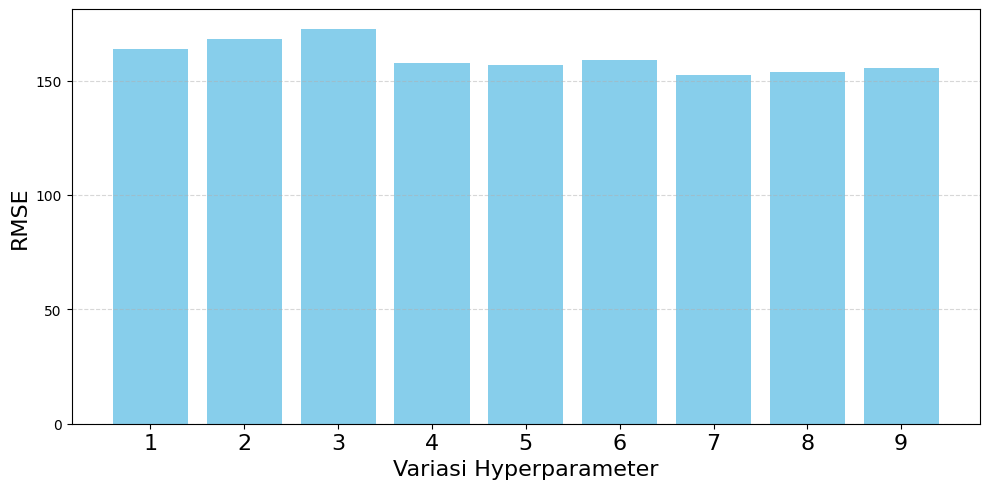


Mapping Kombinasi:
1: Hidden Size=16.0, Learning Rate=0.5, Epoch=50.0
2: Hidden Size=16.0, Learning Rate=0.1, Epoch=50.0
3: Hidden Size=16.0, Learning Rate=0.001, Epoch=50.0
4: Hidden Size=32.0, Learning Rate=0.5, Epoch=50.0
5: Hidden Size=32.0, Learning Rate=0.1, Epoch=50.0
6: Hidden Size=32.0, Learning Rate=0.001, Epoch=50.0
7: Hidden Size=128.0, Learning Rate=0.5, Epoch=50.0
8: Hidden Size=128.0, Learning Rate=0.1, Epoch=50.0
9: Hidden Size=128.0, Learning Rate=0.001, Epoch=50.0


In [48]:
plt.figure(figsize=(10,5))
plt.bar(results_df.index + 1, results_df["RMSE"], color="skyblue")
plt.xticks(results_df.index + 1, results_df.index + 1, fontsize=16)

plt.xlabel("Variasi Hyperparameter", fontsize=16)
plt.ylabel("RMSE", fontsize=16)
plt.tight_layout()

ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(50))

plt.grid(True, linestyle="--", alpha=0.5, axis="y")
plt.show()

print("\nMapping Kombinasi:")
for i, row in results_df.iterrows():
    print(f"{i+1}: Hidden Size={row['Hidden Size']}, Learning Rate={row['Learning Rate']}, Epoch={row['Epochs']}")


###2. Jumlah Epoch 100

In [56]:
hidden_sizes = [16, 32, 128]
lrs = [0.5, 0.1, 0.001]
epochs_list = [100]

results = []
best_model, best_y_true, best_y_pred = None, None, None
best_train_loss, best_val_loss, best_params = None, None, None

for hs, lr, ep in product(hidden_sizes, lrs, epochs_list):
    model, rmse, mape, train_loss, val_loss, y_true, y_pred = train_model(
        hs, lr, ep, X_train, y_train, X_test, y_test, input_shape
    )
    results.append({
        "Hidden Size": hs,
        "Learning Rate": lr,
        "Epochs": ep,
        "RMSE": rmse,
        "MAPE": mape
    })
    print(f"Done -> Hidden:{hs}, LR:{lr}, Epochs:{ep}, RMSE:{rmse:.4f}, MAPE:{mape:.2f}%")

    if best_model is None or rmse < min(r["RMSE"] for r in results):
        best_model = model
        best_y_true, best_y_pred = y_true, y_pred
        best_train_loss, best_val_loss = train_loss, val_loss
        best_params = (hs, lr, ep)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step
Done -> Hidden:16, LR:0.5, Epochs:100, RMSE:149.5771, MAPE:1.67%
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
Done -> Hidden:16, LR:0.1, Epochs:100, RMSE:153.7601, MAPE:1.71%
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
Done -> Hidden:16, LR:0.001, Epochs:100, RMSE:163.5023, MAPE:1.82%
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step
Done -> Hidden:32, LR:0.5, Epochs:100, RMSE:142.3567, MAPE:1.59%
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
Done -> Hidden:32, LR:0.1, Epochs:100, RMSE:140.6042, MAPE:1.58%
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
Done -> Hidden:32, LR:0.001, Epochs:100, RMSE:146.9085, MAPE:1.65%
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step
Done -> Hidden:128, LR:0.5, Epochs:100, RMSE:128.7873, MAPE:1.44%
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step
Done -> Hidden:128, LR:0.1, Epochs:100, RMSE:132.9084, MAPE:1.51%
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step
Done -> Hidden:128, LR:0.001, Epochs:100, RMSE:131.5356, MAPE:1.46%
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step
Done -> Hidden:16, LR:0.5,

#Menyimpan Hasil ke Excel

In [57]:
results_df = pd.DataFrame(results)
save_path = "/content/drive/MyDrive/Skripsi_ProgramCNNLSTM/Hasil_GridSearch_CNNLSTM_Epoch100.xlsx"
results_df.to_excel(save_path, index=False)
print(f"\nHasil grid search berhasil disimpan di: {save_path}")


Hasil grid search berhasil disimpan di: /content/drive/MyDrive/Skripsi_ProgramCNNLSTM/Hasil_GridSearch_CNNLSTM_Epoch100.xlsx

Hasil grid search berhasil disimpan di: /content/drive/MyDrive/Skripsi_ProgramCNNLSTM/Hasil_GridSearch_CNNLSTM_Epoch100.xlsx


#Barplot Nilai RMSE dengan Epoch 100

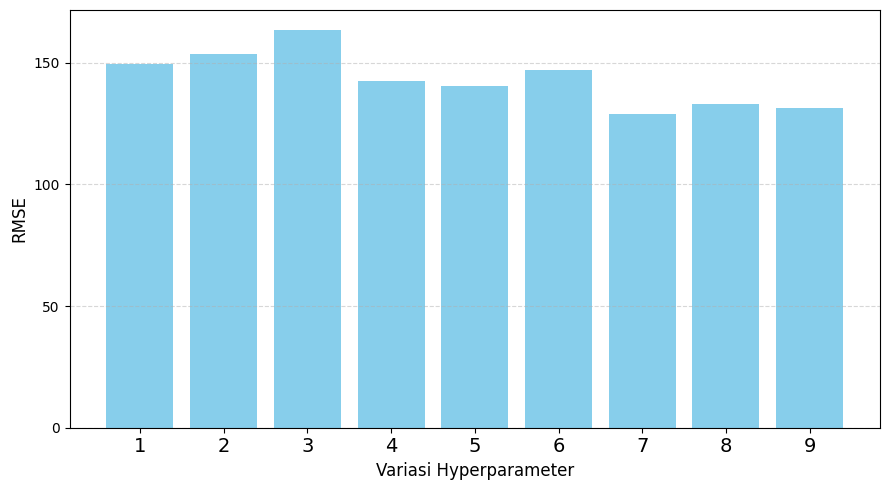


Mapping Kombinasi:
1: Hidden Size=16.0, Learning Rate=0.5, Epoch=100.0
2: Hidden Size=16.0, Learning Rate=0.1, Epoch=100.0
3: Hidden Size=16.0, Learning Rate=0.001, Epoch=100.0
4: Hidden Size=32.0, Learning Rate=0.5, Epoch=100.0
5: Hidden Size=32.0, Learning Rate=0.1, Epoch=100.0
6: Hidden Size=32.0, Learning Rate=0.001, Epoch=100.0
7: Hidden Size=128.0, Learning Rate=0.5, Epoch=100.0
8: Hidden Size=128.0, Learning Rate=0.1, Epoch=100.0
9: Hidden Size=128.0, Learning Rate=0.001, Epoch=100.0


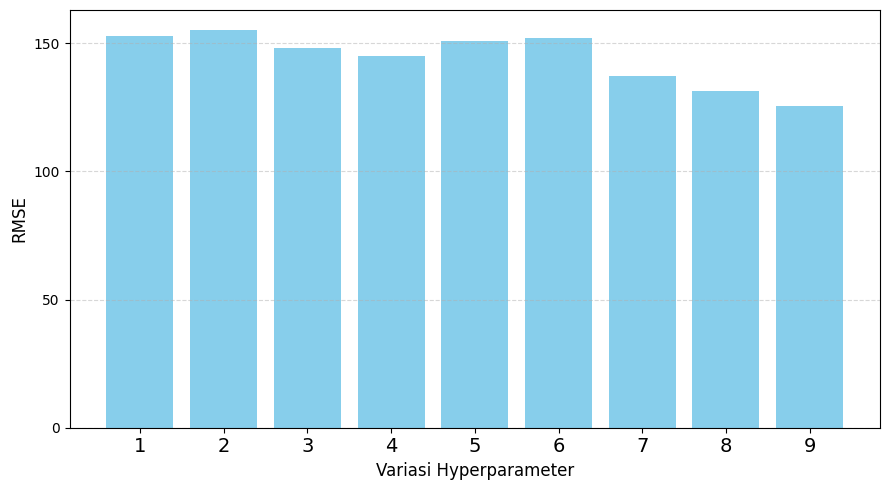


Mapping Kombinasi:
1: Hidden Size=16.0, Learning Rate=0.5, Epoch=100.0
2: Hidden Size=16.0, Learning Rate=0.1, Epoch=100.0
3: Hidden Size=16.0, Learning Rate=0.001, Epoch=100.0
4: Hidden Size=32.0, Learning Rate=0.5, Epoch=100.0
5: Hidden Size=32.0, Learning Rate=0.1, Epoch=100.0
6: Hidden Size=32.0, Learning Rate=0.001, Epoch=100.0
7: Hidden Size=128.0, Learning Rate=0.5, Epoch=100.0
8: Hidden Size=128.0, Learning Rate=0.1, Epoch=100.0
9: Hidden Size=128.0, Learning Rate=0.001, Epoch=100.0


In [58]:
plt.figure(figsize=(9,5))
plt.bar(results_df.index + 1, results_df["RMSE"], color="skyblue")
plt.xticks(results_df.index + 1, results_df.index + 1, fontsize=14)

plt.xlabel("Variasi Hyperparameter", fontsize=12)
plt.ylabel("RMSE", fontsize=12)

ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(50))

plt.tight_layout()
plt.grid(True, linestyle="--", alpha=0.5, axis="y")
plt.show()

print("\nMapping Kombinasi:")
for i, row in results_df.iterrows():
    print(f"{i+1}: Hidden Size={row['Hidden Size']}, Learning Rate={row['Learning Rate']}, Epoch={row['Epochs']}")


#Grafik IHSG Antara Data Aktual dan Data Prediksi dengan Hyperparameter Terbaik

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step
Model -> HS:128, LR:0.001, Ep:100, RMSE:138.251, MAPE:1.58%


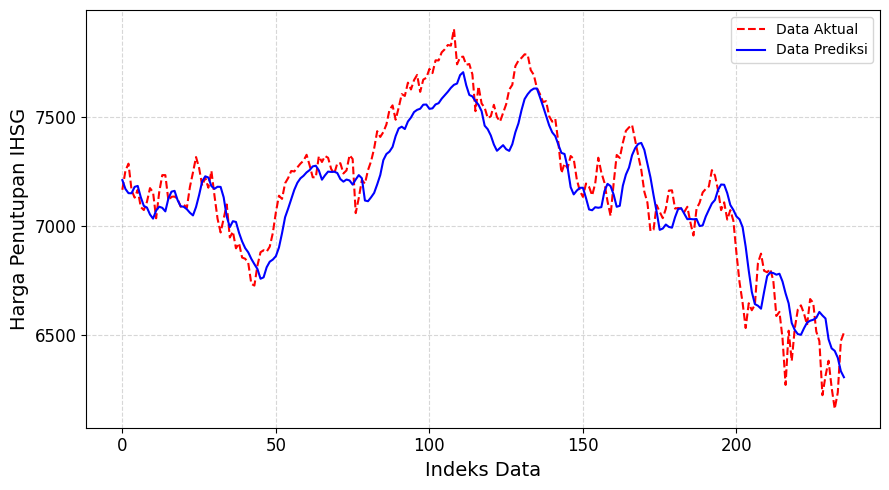

In [59]:
hs = 128
lr = 0.001
ep = 100

# Latih ulang model dengan hyperparameter
model, rmse, mape, train_loss, val_loss, y_true, y_pred = train_model(
    hs, lr, ep, X_train, y_train, X_test, y_test, input_shape
)

print(f"Model -> HS:{hs}, LR:{lr}, Ep:{ep}, RMSE:{rmse:.3f}, MAPE:{mape:.2f}%")

# Visualisasi Data Aktual dan Data Prediksi
plt.figure(figsize=(9,5))
plt.plot(y_true, label="Data Aktual", color="red", linestyle="--")
plt.plot(y_pred, label="Data Prediksi", color="blue", linestyle="-")

plt.xlabel("Indeks Data", fontsize=14)
plt.ylabel("Harga Penutupan IHSG", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(500))

plt.legend()
plt.tight_layout()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

#Learning Curve Model CNN-LSTM

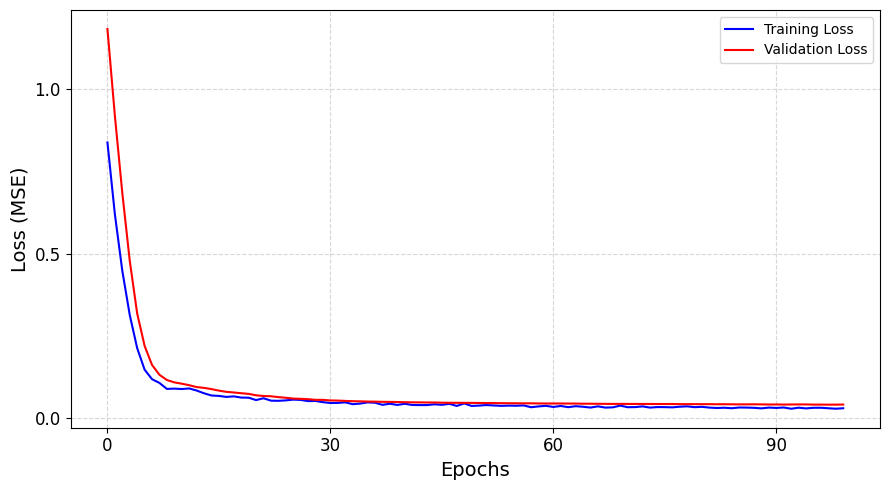

In [53]:
plt.figure(figsize=(9,5))
plt.plot(best_train_loss, label='Training Loss', color='blue')
plt.plot(best_val_loss, label='Validation Loss', color='red')

plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss (MSE)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.legend()
plt.tight_layout()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()